# ***逐步构建你的深度神经网络***

# 0. 背景

## 0.1 要解决的问题

案例描述：在此之前你已经训练了一个2层的神经网络（只有一个隐藏层）。本周，你将学会构建一个任意层数的深度神经网络！
1. 在此作业中，你将实现构建深度神经网络所需的所有函数。
2. 在下一个作业中，你将使用这些函数来构建一个用于图像分类的深度神经网络。

完成此任务后，你将能够：
1. 使用ReLU等非线性单位来改善模型
2. 建立更深的神经网络（具有1个以上的隐藏层）
3. 实现一个易于使用的神经网络类

符号说明：
1. 上标$[l]$表示与$l^{th}$层相关的数量。
 - 示例： $a^{[L]}$是$L^{th}$层的激活。$W^{[L]}$和$b^{[L]}
$是$L^{th}$层参数。
2. 上标$(i)$表示与$i^{th}$示例相关的数量。
 - 示例：$x^{(i)}$是第$i^{th}$的训练数据。
3. 下标$i$表示$i^{th}$的向量。
 - 示例：$a^{[l]}_i$表示$l^{th}$层激活的$i^{th}$输入。

## 0.2 作业大纲

① 为了构建你的神经网络，你将实现几个“辅助函数”。

② 这些辅助函数将在下一个作业中使用，用来构建一个两层神经网络和一个L层的神经网络。

③ 你将实现的每个函数都有详细的说明，这些说明将指导你完成必要的步骤。

④ 此作业的大纲如下：

1. 初始化两层的网络和层的神经网络的参数。

2. 实现正向传播模块（在下图中以紫色显示）。

 - 完成模型正向传播步骤的LINEAR部分（）。
 - 提供使用的ACTIVATION函数（relu / Sigmoid）。
 - 将前两个步骤合并为新的[LINEAR-> ACTIVATION]前向函数。
 - 堆叠[LINEAR-> RELU]正向函数L-1次（第1到L-1层），并在末尾添加[LINEAR-> SIGMOID]（最后的层）。这合成了一个新的L_model_forward函数。

3. 计算损失。

4. 实现反向传播模块（在下图中以红色表示）。

 - 完成模型反向传播步骤的LINEAR部分。
 - 提供的ACTIVATE函数的梯度（relu_backward / sigmoid_backward）
 - 将前两个步骤组合成新的[LINEAR-> ACTIVATION]反向函数。
 - 将[LINEAR-> RELU]向后堆叠L-1次，并在新的L_model_backward函数中后向添加[LINEAR-> SIGMOID]
最后更新参数。

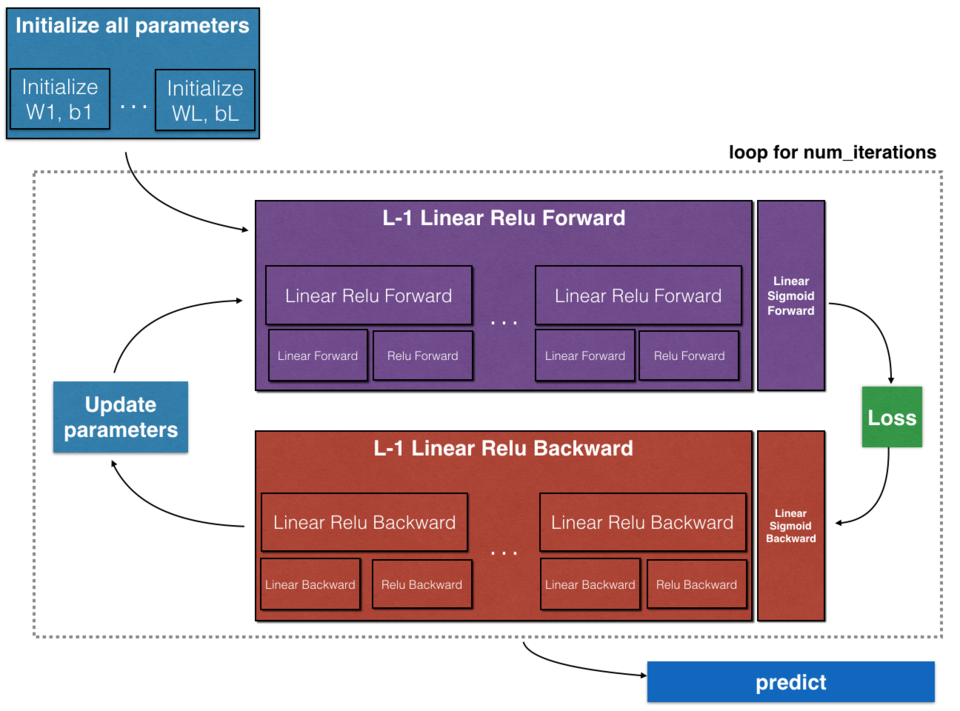

注意：对于每个正向函数，都有一个对应的反向函数。 这也是为什么在正向传播模块的每一步都将一些值存储在缓存中的原因。缓存的值可用于计算梯度。 然后，在反向传导模块中，你将使用缓存的值来计算梯度。 此作业将指导说明如何执行这些步骤。

## 0.3 构建深层神经网络步骤

① 我们来说一下步骤：

1. 初始化网络参数
2. 前向传播
 - 2.1 计算一层的中线性求和的部分
 - 2.2 计算激活函数的部分（ReLU使用L-1次，Sigmod使用1次）
 - 2.3 结合线性求和与激活函数
3. 计算误差
4. 反向传播
 - 4.1 线性部分的反向传播公式
 - 4.2 激活函数部分的反向传播公式
 - 4.3 结合线性部分与激活函数的反向传播公式
5. 更新参数

② 对于每个前向函数，都有一个相应的后向函数。

③ 这就是为什么在我们的前向模块的每一步都会在cache中存储一些值，cache的值对计算梯度很有用，在反向传播模块中，我们将使用cache来计算梯度。

④ 现在我们正式开始分别构建两层神经网络和多层神经网络。

# 1. 导入包

① numpy是Python科学计算的基本包。

② matplotlib是在Python中常用的绘制图形的库。

③ dnn_utils为此笔记本提供了一些必要的函数。

④ testCases提供了一些测试用例来评估函数的正确性

⑤ np.random.seed（1）使所有随机函数调用保持一致。 这将有助于我们评估你的作业，请不要改变seed。

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from testCases_v2 import *
from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward
import lr_utils

① 软件包准备好了，我们开始构建初始化参数的函数。

② 为了和我的数据匹配，你需要指定随机种子

In [2]:
np.random.seed(1) 

# 2. 初始化参数

## 2.1 2层神经网络

① 对于一个两层的神经网络结构而言，模型结构是线性->ReLU->线性->sigmod函数。

In [3]:
def initialize_parameters(n_x, n_h, n_y):
    """
    此函数是为了初始化两层网络参数而使用的函数。
    参数：
        n_x - 输入层节点数量
        n_h - 隐藏层节点数量
        n_y - 输出层节点数量
    
    返回：
        parameters - 包含你的参数的python字典：
            W1 - 权重矩阵,维度为（n_h，n_x）
            b1 - 偏向量，维度为（n_h，1）
            W2 - 权重矩阵，维度为（n_y，n_h）
            b2 - 偏向量，维度为（n_y，1）

    """
    
    np.random.seed(1)
    
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y,1)) 
    
    # 使用断言确保我的数据格式是正确的
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

In [4]:
# 测试一下 测试initialize_parameters 函数
print("==============测试initialize_parameters==============")
parameters = initialize_parameters(2,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

==============测试initialize_parameters==============
W1 = [[ 0.01624345 -0.00611756]
 [-0.00528172 -0.01072969]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.00865408 -0.02301539]]
b2 = [[0.]]


## 2.2 L层神经网络

① 两层的神经网络测试已经完毕了，那么对于一个L层的神经网络而言呢？初始化会是什么样的？

② 更深的L层神经网络的初始化更加复杂，因为存在更多的权重矩阵和偏差向量。

③ 完成 initialize_parameters_deep 后，应确保各层之间的维度匹配。

④ 回想一下，$n^{[l]}$是$l$层中的神经元数量。

⑤ 因此，如果我们输入的$X$的大小为$(12288, 209)$（以$m=209
$为例），则：

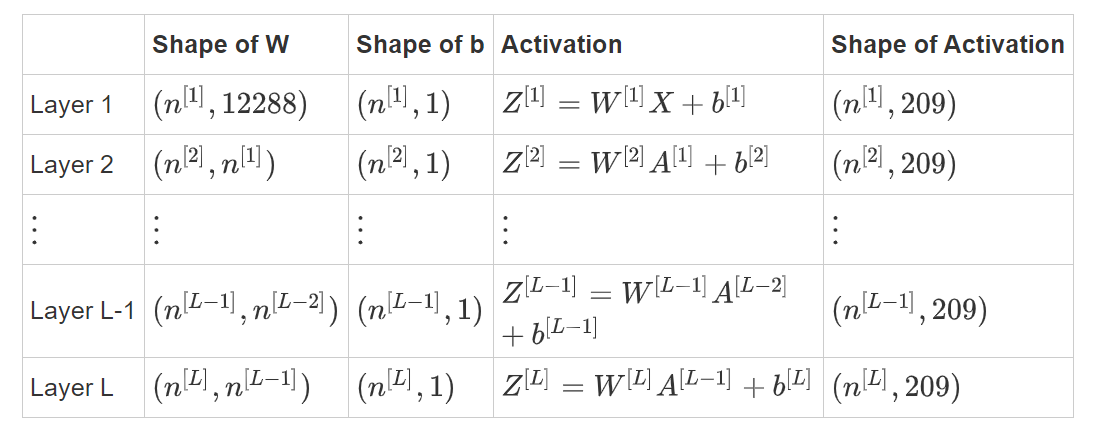

<center>图1</center>

① 矩阵的计算方法还是要说一下的：
$W = \begin{bmatrix}  
    j  & k  & l\\  
    m  & n & o \\  
    p  & q & r    
\end{bmatrix}\;\;\; X = \begin{bmatrix}  
    a  & b  & c\\  
    d  & e & f \\  
    g  & h & i   
\end{bmatrix} \;\;\; b =\begin{bmatrix}  
    s  \\  
    t  \\  
    u  
\end{bmatrix}\tag{2}$

② 如果要计算 $WX + b$ 的话，计算方法是这样的：
$WX + b = \begin{bmatrix}  
    (ja + kd + lg) + s  & (jb + ke + lh) + s  & (jc + kf + li)+ s\\  
    (ma + nd + og) + t & (mb + ne + oh) + t & (mc + nf + oi) + t\\  
    (pa + qd + rg) + u & (pb + qe + rh) + u & (pc + qf + ri)+ u  
\end{bmatrix}\tag{3}$

③ 在实际中，也不需要你去做这么复杂的运算，下面将展示它是怎样计算的。

④ 这是$L=1$（一层神经网络）的实现。以启发你如何实现通用的神经网络（L层神经网络）。

In [ ]:
if L == 1:
    parameters["W" + str(L)] = np.random.randn(layer_dims[1], layer_dims[0]) * 0.01  
    parameters["b" + str(L)] = np.zeros((layer_dims[1], 1))

In [5]:
def initialize_parameters_deep(layer_dims):
    """
    此函数是为了初始化多层网络参数而使用的函数。
    参数：
        layers_dims - 包含我们网络中每个图层的节点数量的列表
    
    返回：
        parameters - 包含参数“W1”，“b1”，...，“WL”，“bL”的字典：
                     W1 - 权重矩阵，维度为（layers_dims [1]，layers_dims [1-1]）
                     bl - 偏向量，维度为（layers_dims [1]，1）
    """

    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)  # 网络层数

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])/np.sqrt(layer_dims[l-1])          
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        
        # 确保我要的数据的格式是正确的
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
        
    return parameters

In [6]:
# 测试一下 initialize_parameters_deep 函数
print("==============测试initialize_parameters_deep==============")
layers_dims = [5,4,3] 
parameters = initialize_parameters_deep(layers_dims)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

==============测试initialize_parameters_deep==============
W1 = [[ 0.79989897  0.19521314  0.04315498 -0.83337927 -0.12405178]
 [-0.15865304 -0.03700312 -0.28040323 -0.01959608 -0.21341839]
 [-0.58757818  0.39561516  0.39413741  0.76454432  0.02237573]
 [-0.18097724 -0.24389238 -0.69160568  0.43932807 -0.49241241]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.59252326 -0.10282495  0.74307418  0.11835813]
 [-0.51189257 -0.3564966   0.31262248 -0.08025668]
 [-0.38441818 -0.11501536  0.37252813  0.98805539]]
b2 = [[0.]
 [0.]
 [0.]]


# 3. 前项传播函数

## 3.1 前项传播步骤

① 现在，你已经初始化了参数，接下来将执行正向传播模块。 首先实现一些基本函数，用于稍后的模型实现。按以下顺序完成三个函数：

1. LINEAR
2. LINEAR -> ACTIVATION，其中激活函数采用ReLU或Sigmoid。
3. [LINEAR -> RELU] × (L-1) -> LINEAR -> SIGMOID（整个模型）

## 3.2 线性前向

① 线性正向模块（在所有数据中均进行向量化）的计算按照以下公式：
$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}\tag{4}$

 - 其中 $A^{[0]} = X$
 
② 前向传播中，线性部分计算如下：

In [7]:
def linear_forward(A, W, b):
    """
    实现前向传播的线性部分。

    参数：
        A - 来自上一层（或输入数据）的激活，维度为(上一层的节点数量，示例的数量）
        W - 权重矩阵，numpy数组，维度为（当前图层的节点数量，前一图层的节点数量）
        b - 偏向量，numpy向量，维度为（当前图层节点数量，1）

    返回：
         Z - 激活功能的输入，也称为预激活参数
         cache - 一个包含“A”，“W”和“b”的字典，存储这些变量以有效地计算后向传递
    """
    
    Z = np.dot(W,A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [8]:
#测试一下 linear_forward 函数
print("==============测试linear_forward==============")
A, W, b = linear_forward_test_case()
Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z)) 

==============测试linear_forward==============
Z = [[ 3.26295337 -1.23429987]]


③ 我们前向传播的单层计算完成了一半啦！我们来开始构建后半部分。

## 3.3 线性激活部分

① 为了更方便，我们将把两个功能（线性和激活）分组为一个功能（LINEAR-> ACTIVATION）。

② 因此，我们将实现一个函数用以执行LINEAR正向步骤和ACTIVATION正向步骤。

③ 实现 LINEAR->ACTIVATION 层的正向传播。 数学表达式为：$A^{[l]} = g(Z^{[l]}) = g(W^{[l]}A^{[l-1]} +b^{[l]})$，其中激活"g" 可以是sigmoid（）或relu（）。

④ 使用 linear_forward（）和正确的激活函数。

在此笔记本中，你将使用两个激活函数：

1. Sigmoid：$\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$。 我们为你提供了“ Sigmoid”函数。 该函数返回两项值：激活值"a"和包含"Z"的"cache"（这是我们将馈入到相应的反向函数的内容）。 你可以按下述方式得到两项值：A, activation_cache = sigmoid(Z)
2. ReLU：ReLu的数学公式为$A = RELU(Z) = max(0, Z)$。我们为你提供了relu函数。 该函数返回两项值：激活值“A”和包含“Z”的“cache”（这是我们将馈入到相应的反向函数的内容）。 你可以按下述方式得到两项值：A, activation_cache = relu(Z)

In [9]:
def linear_activation_forward(A_prev, W, b, activation):
    '''
    实现LINEAR-> ACTIVATION 这一层的前向传播

    参数：
        A_prev - 来自上一层（或输入层）的激活，维度为(上一层的节点数量，示例数）
        W - 权重矩阵，numpy数组，维度为（当前层的节点数量，前一层的大小）
        b - 偏向量，numpy阵列，维度为（当前层的节点数量，1）
        activation - 选择在此层中使用的激活函数名，字符串类型，【"sigmoid" | "relu"】

    返回：
        A - 激活函数的输出，也称为激活后的值
        cache - 一个包含“linear_cache”和“activation_cache”的字典，我们需要存储它以有效地计算后向传递
    '''
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [10]:
#测试一下 linear_activation_forward 函数
print("==============测试linear_activation_forward==============")
A_prev, W, b = linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

==============测试linear_activation_forward==============
With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]


⑤ 在深度学习中，"[LINEAR->ACTIVATION]"计算被视为神经网络中的单个层，而不是两个层。

## 3.4 L层前项传播模型

① 我们把两层模型需要的前向传播函数做完了，那多层网络模型的前向传播是怎样的呢？

② 我们调用上面的那两个函数来实现它，为了在实现L层神经网络时更加方便，我们需要一个函数来复制前一个函数（带有RELU的linear_activation_forward）L-1次，然后用一个带有SIGMOID的linear_activation_forward跟踪它，我们来看一下它的结构是怎样的：

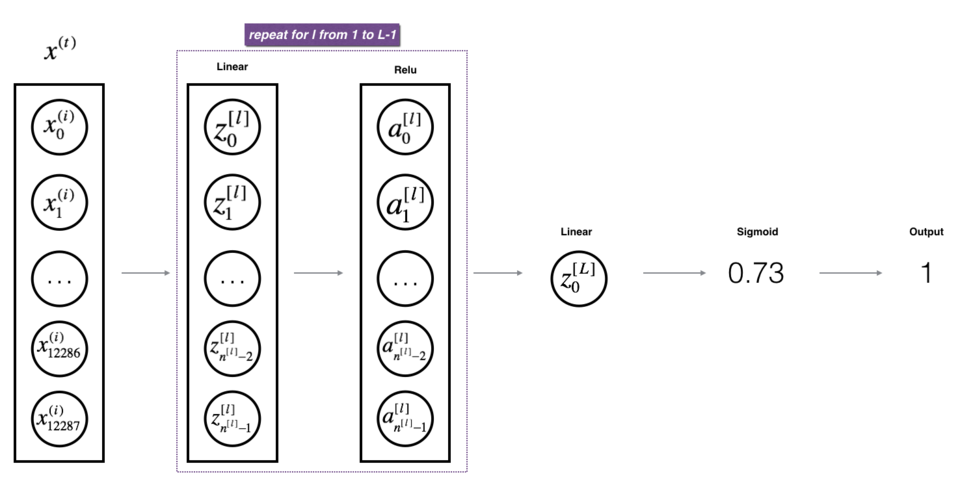

<center>图2 : [LINEAR -> RELU]  (L-1) -> LINEAR -> SIGMOID 模型</center>

练习：实现上述模型的正向传播。

说明：在下面的代码中，变量AL表示$A^{[L]} = \sigma(Z^{[L]}) = \sigma(W^{[L]} A^{[L-1]} + b^{[L]})$（有时也称为Yhat，即$\hat{Y}$。）

提示：

1. 使用你先前编写的函数
2. 使用for循环复制[LINEAR-> RELU]（L-1）次
3. 不要忘记在“cache”列表中更新缓存。 要将新值 c 添加到list中，可以使用list.append(c)。

In [11]:
def L_model_forward(X, parameters):

    """
    实现[LINEAR-> RELU] *（L-1） - > LINEAR-> SIGMOID计算前向传播，
    也就是多层网络的前向传播，为后面每一层都执行LINEAR和ACTIVATION
    
    参数：
        X - 数据，numpy数组，维度为（输入节点数量，示例数）
        parameters - initialize_parameters_deep（）的输出
    
    返回：
        AL - 最后的激活值
        caches - 包含以下内容的缓存列表：
                 linear_relu_forward（）的每个cache（有L-1个，索引为从0到L-2）
                 linear_sigmoid_forward（）的cache（只有一个，索引为L-1）
    """
    
    caches = []
    A = X
    L = len(parameters) // 2  # 神经网络的层数
    
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev,parameters['W' + str(l)],parameters['b' + str(l)],activation = "relu")
        caches.append(cache)
    
    AL, cache = linear_activation_forward(A,parameters['W' + str(L)],parameters['b' + str(L)],activation = "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [12]:
# 测试一下 L_model_forward 函数
print("==============测试L_model_forward==============")
X, parameters = L_model_forward_test_case()
AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

==============测试L_model_forward==============
AL = [[0.17007265 0.2524272 ]]
Length of caches list = 2


## 3.5 计算成本

① 现在，我们有了一个完整的正向传播模块，它接受输入X并输出包含预测的行向量。 它还将所有中间值记录在"caches"中以计算预测的损失值。

② 我们需要计算成本（误差），以确定它到底有没有在学习，我们使用以下公式计算交叉熵损失$J$：

$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{5}$

In [13]:
def compute_cost(AL, Y):
    """
    实施等式（5）定义的成本函数。

    参数：
        AL - 与标签预测相对应的概率向量，维度为（1，示例数量）
        Y - 标签向量（例如：如果不是猫，则为0，如果是猫则为1），维度为（1，数量）

    返回：
        cost - 交叉熵成本
    """
    
    m = Y.shape[1]
    cost = -1 / m * np.sum(Y * np.log(AL) + (1-Y) * np.log(1-AL),axis=1,keepdims=True)
    
    cost = np.squeeze(cost)   
    
    return cost

In [14]:
Y, AL = compute_cost_test_case()

print("cost = " + str(compute_cost(AL, Y)))

cost = 0.41493159961539694


③ 我们已经把误差值计算出来了，现在开始进行反向传播。

# 4. 反向传播模块

## 4.1 反向传播流程图

① 反向传播用于计算相对于参数的损失函数的梯度，我们来看看向前和向后传播的流程图：

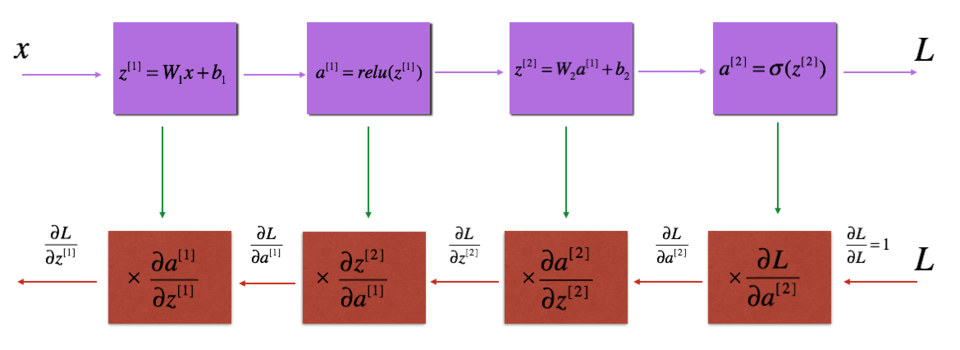

## 4.2 线性反向

① 流程图有了，我们再来看一看对于线性的部分的公式：

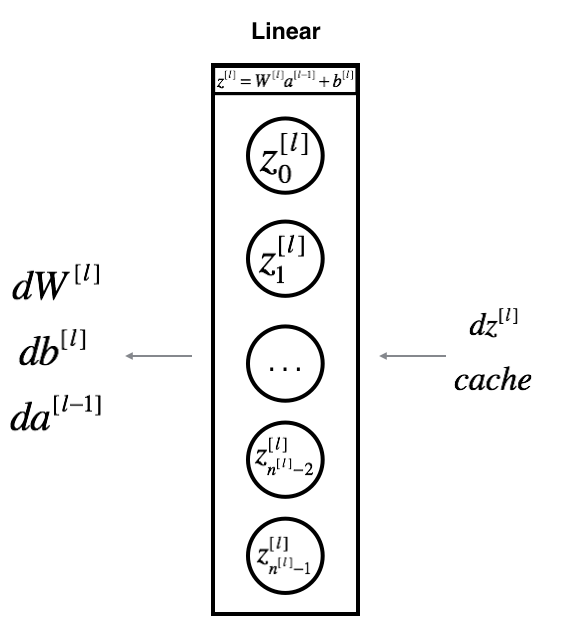

② 使用输入$dZ^{[l]}$计算三个输出$(dW^{[l]}, db^{[l]}, dA^{[l]})
$，以下是所需的公式：
$$dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{8}$$
$$db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{9}$$
$$dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{10}$$

In [15]:
def linear_backward(dZ, cache):
    """
    为单层实现反向传播的线性部分（第L层）

    参数：
         dZ - 相对于（当前第l层的）线性输出的成本梯度
         cache - 来自当前层前向传播的值的元组（A_prev，W，b）

    返回：
         dA_prev - 相对于激活（前一层l-1）的成本梯度，与A_prev维度相同
         dW - 相对于W（当前层l）的成本梯度，与W的维度相同
         db - 相对于b（当前层l）的成本梯度，与b维度相同
    """
    
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = 1 / m * np.dot(dZ ,A_prev.T)
    db = 1 / m * np.sum(dZ,axis = 1 ,keepdims=True)
    dA_prev = np.dot(W.T,dZ) 
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [16]:
#测试一下 linear_backward 函数
print("==============测试linear_backward==============")
dZ, linear_cache = linear_backward_test_case()
dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

==============测试linear_backward==============
dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = [[0.50629448]]


## 4.3 线性激活部分

① 为了帮助你实现linear_activation_backward，我们提供了两个反向函数：
 - sigmoid_backward()
 - relu_backward()

② sigmoid_backward()：实现sigmoid()函数的反向传播，你可以这样调用它：
$$dZ = sigmoid_backward(dA, activation_cache)$$

③ relu_backward()：实现relu()函数的反向传播。 你可以这样调用它：
$$dZ = relu_backward(dA, activation_cache)$$

④ 如果$g(...)$是激活函数，sigmoid_backward()和relu_backward()这样计算：
$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}) \tag{11}$

⑤ 我们现在正式开始实现后向线性激活：

In [17]:
def linear_activation_backward(dA, cache, activation):
    """
    实现LINEAR-> ACTIVATION层的后向传播。
    
    参数：
         dA - 当前层l的激活后的梯度值
         cache - 我们存储的用于有效计算反向传播的值的元组（值为linear_cache，activation_cache）
         activation - 要在此层中使用的激活函数名，字符串类型，【"sigmoid" | "relu"】
    返回：
         dA_prev - 相对于激活（前一层l-1）的成本梯度值，与A_prev维度相同
         dW - 相对于W（当前层l）的成本梯度值，与W的维度相同
         db - 相对于b（当前层l）的成本梯度值，与b的维度相同
    """
    
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [18]:
# 测试一下 linear_activation_backward 函数
print("==============测试linear_activation_backward==============")
AL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

==============测试linear_activation_backward==============
sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


## 4.4 L层后项传播模型

① 我们已经把两层模型的后向计算完成了，对于多层模型我们也需要这两个函数来完成，我们来看一下流程图：

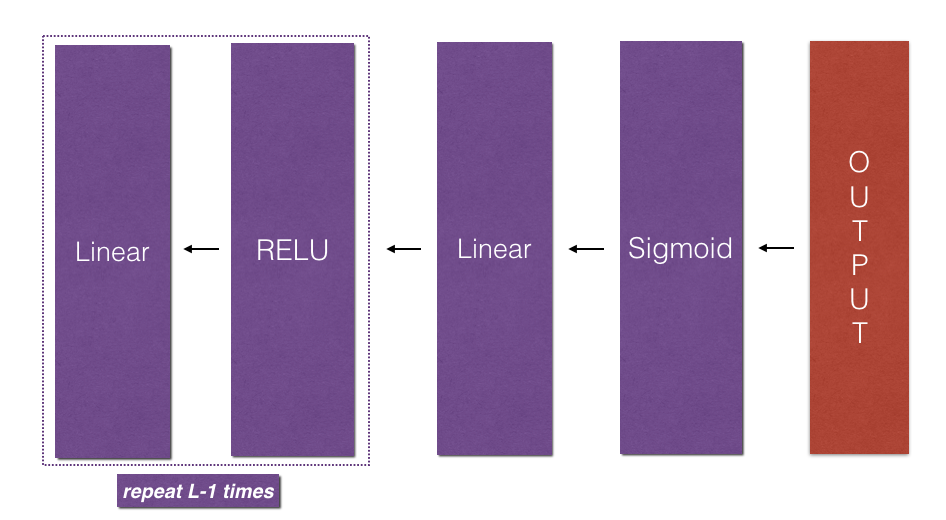

② 在之前的前向计算中，我们存储了一些包含包含（X，W，b和z）的cache，在每次迭代中，我们将会使用它们来计算梯度值，所以，在L层模型中，我们需要从L层遍历所有的隐藏层，在每一步中，我们需要使用那一层的cache值来进行反向传播。

③ 上面我们提到了$A^{[L]}$，它属于输出层 $A^{[L]} = \sigma(Z^{[L]})$，所以我们需要计算dAL，我们可以使用下面的代码来计算它：

dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

④ 计算完了以后，我们可以使用此激活后的梯度dAL继续向后计算，我们这就开始构建多层模型向后传播函数：

In [19]:
def L_model_backward(AL, Y, caches):
    """
    对[LINEAR-> RELU] *（L-1） - > LINEAR - > SIGMOID组执行反向传播，
    就是多层网络的向后传播
    
    参数：
        AL - 概率向量，正向传播的输出（L_model_forward（））
        Y - 标签向量（例如：如果不是猫，则为0，如果是猫则为1），维度为（1，数量）
        caches - 包含以下内容的cache列表：
                 linear_activation_forward（"relu"）的cache，不包含输出层
                 linear_activation_forward（"sigmoid"）的cache
    
    返回：
        grads - 具有梯度值的字典
              grads [“dA”+ str（l）] = ...
              grads [“dW”+ str（l）] = ...
              grads [“db”+ str（l）] = ...
    """
    
    grads = {}
    L = len(caches) 
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) 

    # 初始化反向传播
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
      
    for l in reversed(range(L - 1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+2)], current_cache, activation = "relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [20]:
#测试一下 L_model_backward 函数
print("==============测试L_model_backward==============")
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dA1 = "+ str(grads["dA1"]))

==============测试L_model_backward==============
dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.          0.52257901]
 [ 0.         -0.3269206 ]
 [ 0.         -0.32070404]
 [ 0.         -0.74079187]]


# 5. 更新参数

① 我们把向前向后传播都完成了，现在我们就开始更新参数，当然，我们来看看更新参数的公式吧~
$W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{12}$
$b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{13}$

其中：$\alpha$是学习率。

② 在计算更新的参数后，将它们存储在参数字典中。

③ 对于$l = 1, 2, ..., L$，使用梯度下降更新每个$W^{[l]}$和$b^{[l]}$的参数：

In [21]:
def update_parameters(parameters, grads, learning_rate):
    """
    使用梯度下降更新参数
    
    参数：
        parameters - 包含你的参数的字典
        grads - 包含梯度值的字典，是L_model_backward的输出
    
    返回：
        parameters - 包含更新参数的字典
                   参数[“W”+ str（l）] = ...
                   参数[“b”+ str（l）] = ...
    """
    
    # 神经网络的层数
    L = len(parameters) // 2 

    # 更新每个参数，使用 for 循环
    for l in range(L):
        parameters["W" + str(l+1)] =  parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l + 1)]
        
    return parameters

In [22]:
# 测试一下 update_parameters 函数
print("==============测试update_parameters==============")
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

==============测试update_parameters==============
W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


④ 至此为止，我们已经实现该神经网络中所有需要的函数。

⑤ 接下来，我们将这些方法组合在一起，构成一个神经网络类，可以方便的使用。

# 6. 搭建两层神经网络

## 6.1 两层神经网络模型

① 一个两层的神经网络模型图如下：

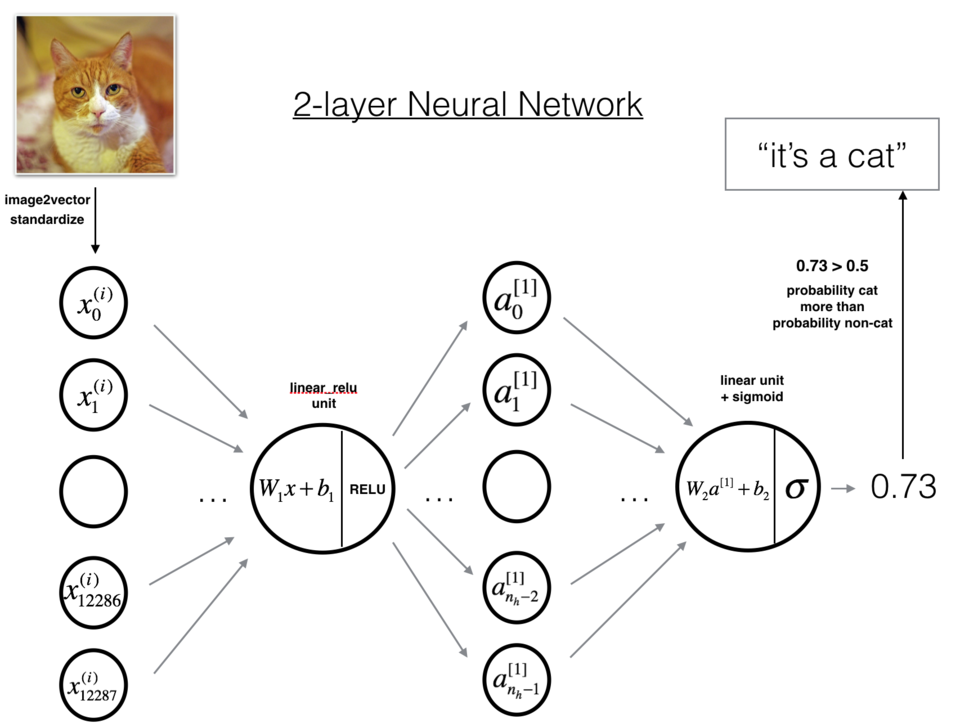

② 该模型可以概括为： **INPUT -> LINEAR -> RELU -> LINEAR -> SIGMOID -> OUTPUT**

In [23]:
def two_layer_model(X,Y,layers_dims,learning_rate=0.0075,num_iterations=3000,print_cost=False,isPlot=True):
    """
    实现一个两层的神经网络，【LINEAR->RELU】 -> 【LINEAR->SIGMOID】
    参数：
        X - 输入的数据，维度为(n_x，例子数)
        Y - 标签，向量，0为非猫，1为猫，维度为(1,数量)
        layers_dims - 层数的向量，维度为(n_y,n_h,n_y)
        learning_rate - 学习率
        num_iterations - 迭代的次数
        print_cost - 是否打印成本值，每100次打印一次
        isPlot - 是否绘制出误差值的图谱
    返回:
        parameters - 一个包含W1，b1，W2，b2的字典变量
    """
    np.random.seed(1)
    grads = {}
    costs = []
    (n_x,n_h,n_y) = layers_dims
    
    """
    初始化参数
    """
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    """
    开始进行迭代
    """
    for i in range(0,num_iterations):
        # 前向传播
        A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")
        
        # 计算成本
        cost = compute_cost(A2,Y)
        
        # 后向传播
        ## 初始化后向传播
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        ## 向后传播，输入：“dA2，cache2，cache1”。 输出：“dA1，dW2，db2;还有dA0（未使用），dW1，db1”。
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")
        
        ## 向后传播完成后的数据保存到grads
        grads["dW1"] = dW1
        grads["db1"] = db1
        grads["dW2"] = dW2
        grads["db2"] = db2
        
        #更新参数
        parameters = update_parameters(parameters,grads,learning_rate)
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # 打印成本值，如果print_cost=False则忽略
        if i % 100 == 0:
            # 记录成本
            costs.append(cost)
            # 是否打印成本值
            if print_cost:
                print("第", i ,"次迭代，成本值为：" ,np.squeeze(cost))
    # 迭代完成，根据条件绘制图
    if isPlot:
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
    
    # 返回 parameters
    return parameters

## 6.2 加载数据集

① 我们现在开始加载数据集。

In [24]:
train_set_x_orig , train_set_y , test_set_x_orig , test_set_y , classes = lr_utils.load_dataset()

## 6.3 数据集处理

① 图像数据集的处理可以参照 课程1_第2周_作业，就连数据集也是一样的。

In [25]:
train_set_x_orig , train_set_y , test_set_x_orig , test_set_y , classes = lr_utils.load_dataset()

train_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T 
test_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

train_x = train_x_flatten / 255
train_y = train_set_y
test_x = test_x_flatten / 255
test_y = test_set_y

## 6.4 正式训练

① 数据集加载完成，开始正式训练：

第 0 次迭代，成本值为： 0.693049735659989
第 100 次迭代，成本值为： 0.6464320953428849
第 200 次迭代，成本值为： 0.6325140647912677
第 300 次迭代，成本值为： 0.6015024920354665
第 400 次迭代，成本值为： 0.5601966311605747
第 500 次迭代，成本值为： 0.5158304772764729
第 600 次迭代，成本值为： 0.4754901313943325
第 700 次迭代，成本值为： 0.4339163151225749
第 800 次迭代，成本值为： 0.40079775362038905
第 900 次迭代，成本值为： 0.3580705011323798
第 1000 次迭代，成本值为： 0.33942815383664116
第 1100 次迭代，成本值为： 0.3052753636196264
第 1200 次迭代，成本值为： 0.2749137728213018
第 1300 次迭代，成本值为： 0.24681768210614846
第 1400 次迭代，成本值为： 0.19850735037466108
第 1500 次迭代，成本值为： 0.17448318112556646
第 1600 次迭代，成本值为： 0.1708076297809587
第 1700 次迭代，成本值为： 0.11306524562164742
第 1800 次迭代，成本值为： 0.09629426845937158
第 1900 次迭代，成本值为： 0.08342617959726863
第 2000 次迭代，成本值为： 0.07439078704319084
第 2100 次迭代，成本值为： 0.06630748132267933
第 2200 次迭代，成本值为： 0.059193295010381675
第 2300 次迭代，成本值为： 0.05336140348560554
第 2400 次迭代，成本值为： 0.04855478562877016


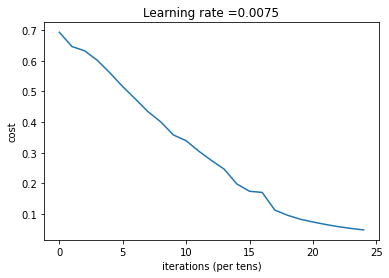

In [26]:
n_x = 12288
n_h = 7
n_y = 1
layers_dims = (n_x,n_h,n_y)

parameters = two_layer_model(train_x, train_set_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True,isPlot=True)

## 6.5 预测

### 6.5.1 预测函数

① 迭代完成之后我们就可以进行预测了，预测函数如下：

In [27]:
def predict(X, y, parameters):
    """
    该函数用于预测L层神经网络的结果，当然也包含两层
    
    参数：
        X - 测试集
        y - 标签
        parameters - 训练模型的参数
    
    返回：
        p - 给定数据集X的预测
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # 神经网络的层数
    p = np.zeros((1,m))
    
    # 根据参数前向传播
    probas, caches = L_model_forward(X, parameters)
    
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    print("准确度为: "  + str(float(np.sum((p == y))/m)))
        
    return p

### 6.5.2 预测训练集和测试集

① 预测函数构建好了我们就开始预测，查看训练集和测试集的准确性：

In [28]:
predictions_train = predict(train_x, train_y, parameters) # 训练集
predictions_test = predict(test_x, test_y, parameters)    # 测试集

准确度为: 1.0
准确度为: 0.72


② 这样看来，我的测试集的准确度要比上一次（课程1_第2周_作业_用神经网络思想实现Logistic回归）高一些，上次的是70%，这次是72%，那如果我使用更多层的神经网络呢？

# 7. 搭建多层神经网络

## 7.1 多层神经网络模型

① 我们首先来看看多层的网络的结构吧~

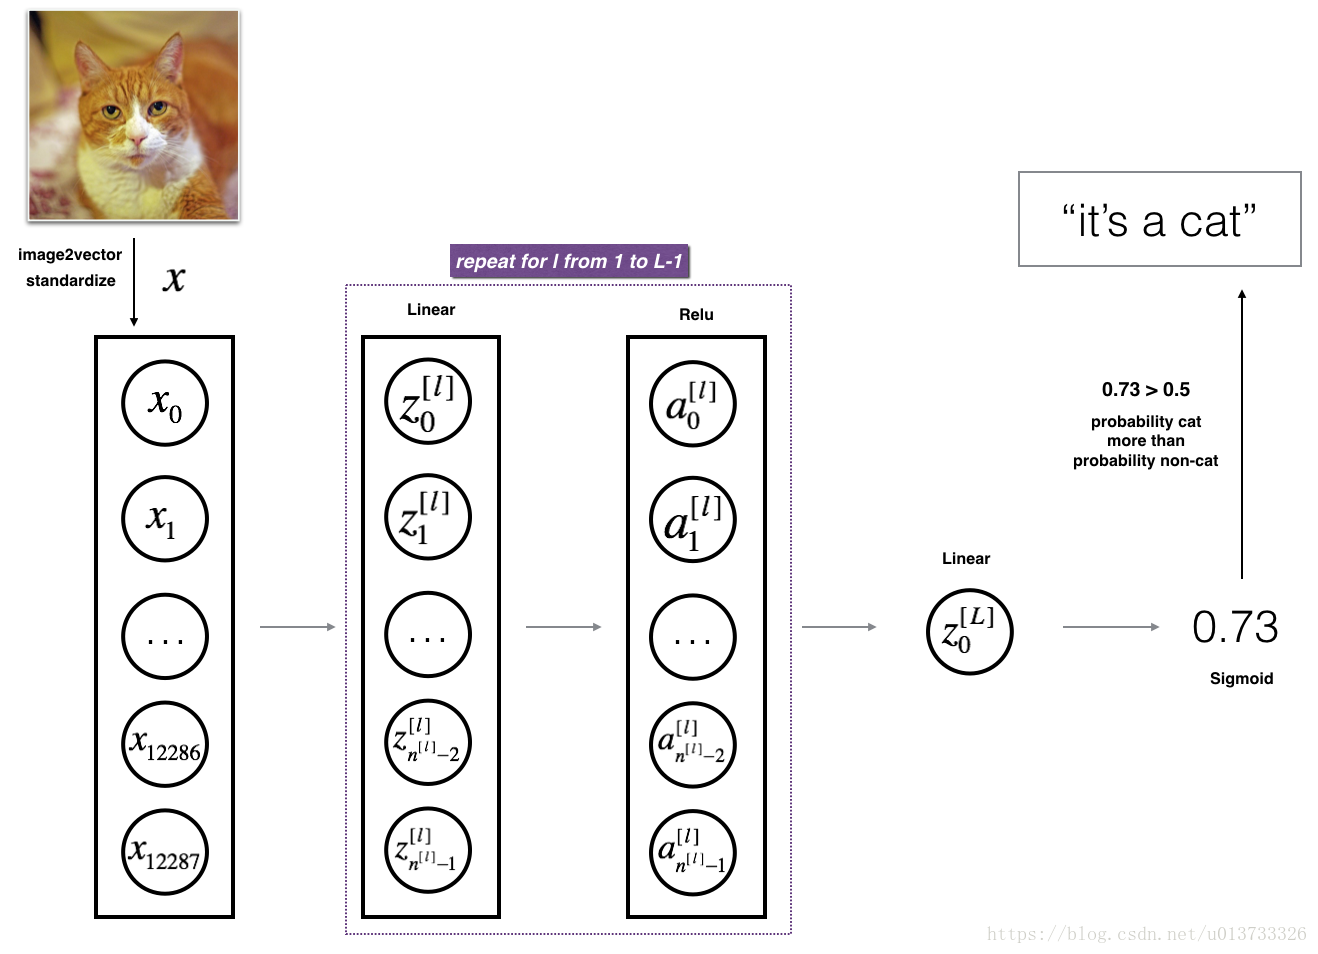

In [29]:
def L_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False,isPlot=True):
    """
    实现一个L层神经网络：[LINEAR-> RELU] *（L-1） - > LINEAR-> SIGMOID。
    
    参数：
        X - 输入的数据，维度为(n_x，例子数)
        Y - 标签，向量，0为非猫，1为猫，维度为(1,数量)
        layers_dims - 层数的向量，维度为(n_y,n_h,···,n_h,n_y)
        learning_rate - 学习率
        num_iterations - 迭代的次数
        print_cost - 是否打印成本值，每100次打印一次
        isPlot - 是否绘制出误差值的图谱
    
    返回：
        parameters - 模型学习的参数。 然后他们可以用来预测。
    """
    np.random.seed(1)
    costs = []
    
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0,num_iterations):
        AL , caches = L_model_forward(X,parameters)
        
        cost = compute_cost(AL,Y)
        
        grads = L_model_backward(AL,Y,caches)
        
        parameters = update_parameters(parameters,grads,learning_rate)
        
        # 打印成本值，如果 print_cost=False 则忽略
        if i % 100 == 0:
            # 记录成本
            costs.append(cost)
            # 是否打印成本值
            if print_cost:
                print("第", i ,"次迭代，成本值为：" ,np.squeeze(cost))
    # 迭代完成，根据条件绘制图
    if isPlot:
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
    return parameters

## 7.2 加载数据集

① 我们现在开始加载数据集。

In [30]:
train_set_x_orig , train_set_y , test_set_x_orig , test_set_y , classes = lr_utils.load_dataset()

## 7.3 数据集处理

① 图像数据集的处理可以参照 课程1_第2周_作业，就连数据集也是一样的。

In [31]:
train_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T 
test_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

train_x = train_x_flatten / 255
train_y = train_set_y
test_x = test_x_flatten / 255
test_y = test_set_y

## 7.4 正式训练

① 数据集加载完成，开始正式训练：

第 0 次迭代，成本值为： 0.7157315134137129
第 100 次迭代，成本值为： 0.6747377593469114
第 200 次迭代，成本值为： 0.6603365433622127
第 300 次迭代，成本值为： 0.6462887802148751
第 400 次迭代，成本值为： 0.6298131216927771
第 500 次迭代，成本值为： 0.606005622926534
第 600 次迭代，成本值为： 0.5690041263975134
第 700 次迭代，成本值为： 0.519796535043806
第 800 次迭代，成本值为： 0.46415716786282285
第 900 次迭代，成本值为： 0.40842030048298916
第 1000 次迭代，成本值为： 0.3731549921606904
第 1100 次迭代，成本值为： 0.3057237457304712
第 1200 次迭代，成本值为： 0.2681015284774085
第 1300 次迭代，成本值为： 0.23872474827672546
第 1400 次迭代，成本值为： 0.20632263257914704
第 1500 次迭代，成本值为： 0.17943886927493502
第 1600 次迭代，成本值为： 0.15798735818800935
第 1700 次迭代，成本值为： 0.14240413012273576
第 1800 次迭代，成本值为： 0.1286516599788407
第 1900 次迭代，成本值为： 0.11244314998149925
第 2000 次迭代，成本值为： 0.08505631034956825
第 2100 次迭代，成本值为： 0.057583911985989486
第 2200 次迭代，成本值为： 0.04456753454690567
第 2300 次迭代，成本值为： 0.03808275166596044
第 2400 次迭代，成本值为： 0.03441074901839254


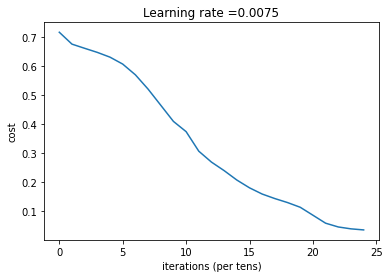

In [32]:
layers_dims = [12288, 20, 7, 5, 1] #  5-layer model
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True,isPlot=True)

## 7.5 预测

### 7.5.1 预测函数

In [33]:
def predict(X, y, parameters):
    """
    该函数用于预测L层神经网络的结果，当然也包含两层
    
    参数：
        X - 测试集
        y - 标签
        parameters - 训练模型的参数
    
    返回：
        p - 给定数据集X的预测
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # 神经网络的层数
    p = np.zeros((1,m))
    
    # 根据参数前向传播
    probas, caches = L_model_forward(X, parameters)
    
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    print("准确度为: "  + str(float(np.sum((p == y))/m)))
        
    return p

### 7.5.2 预测训练集和测试集

In [34]:
pred_train = predict(train_x, train_y, parameters) #训练集
pred_test = predict(test_x, test_y, parameters) #测试集

准确度为: 0.9952153110047847
准确度为: 0.78


① 就准确度而言，从70%到72%再到78%，可以看到的是准确度在一点点增加，当然，你也可以手动的去调整layers_dims，准确度可能又会提高一些。

# 8. 分析

① 我们可以看一看有哪些东西在L层模型中被错误地标记了，导致准确率没有提高。

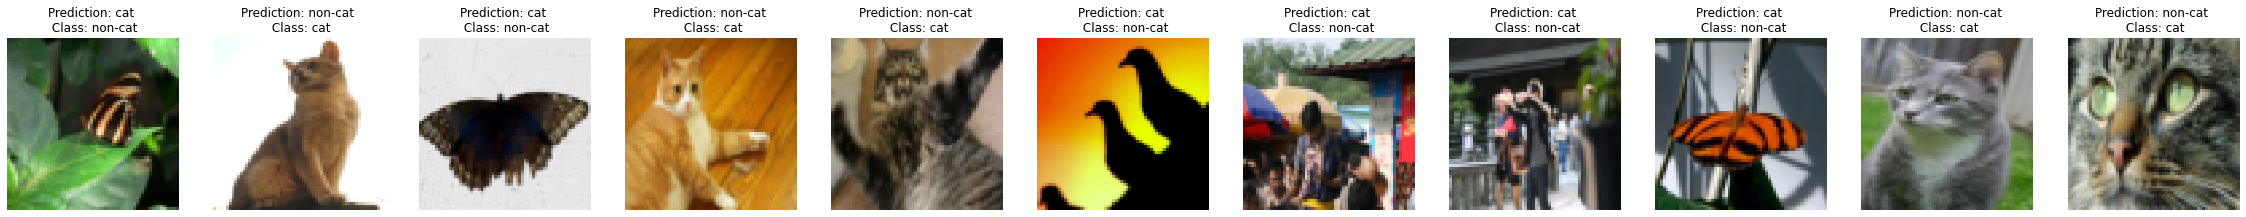

In [35]:
def print_mislabeled_images(classes, X, y, p):
    """
    绘制预测和实际不同的图像。
        X - 数据集
        y - 实际的标签
        p - 预测
    """
    
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # 设置 plot 的默认大小
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))

print_mislabeled_images(classes, test_x, test_y, pred_test)

② 分析一下我们就可以得知原因了，模型往往表现欠佳的几种类型的图像包括：
 - 猫身体在一个不同的位置
 - 猫出现在相似颜色的背景下
 - 不同的猫的颜色和品种
 - 相机角度
 - 图片的亮度
 - 比例变化（猫的图像非常大或很小）